In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [52]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [53]:
data.shape

(100, 3)

In [54]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [55]:
X = data.values[:, :2].T
y = data.values[:, 2:].T
print(X.shape)
print(y.shape)

(2, 100)
(1, 100)


In [56]:
theta = np.zeros((X.shape[0]+1, 1))
theta

array([[0.],
       [0.],
       [0.]])

In [57]:
X = np.concatenate([np.ones([1, X.shape[1]]), X])
X.shape

(3, 100)

In [58]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

Text(0, 0.5, 'Exam 2 score')

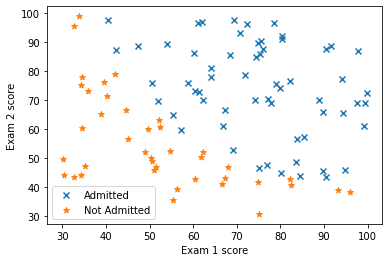

In [59]:
dataAdmitted = data.loc[(data['Admitted'] == 1)]
dataNotAdmitted = data.loc[(data['Admitted'] == 0)]
plt.scatter(dataAdmitted['Exam 1'],dataAdmitted['Exam 2'], label = 'Admitted',marker='x')
plt.scatter(dataNotAdmitted['Exam 1'],dataNotAdmitted['Exam 2'], label = 'Not Admitted',marker='*')
plt.legend()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

In [60]:
def sig(t):
    return 1.0/(1.0 + np.exp(-t))

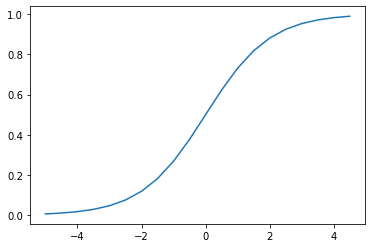

In [61]:
x_sig = np.arange(-5,5,0.5)
y_sig = [sig(i) for i in x_sig]

plt.plot(x_sig,y_sig)

In [62]:
def computeCost(theta,X,y):
    return (-y*np.log(sig(theta.T@X)) -(1-y)*np.log(1-sig(theta.T@X))).sum()/X.shape[1]

In [63]:
theta = np.zeros((X.shape[0], 1))
computeCost(theta,X,y)

0.6931471805599453

In [64]:
def simple_gradient ( X , y , theta , alpha , it ):
    cost = []
    for i in range(it):
       for k in range(X.shape[0]):
           theta[k] = theta[k] - alpha/ X.shape[1] * (sig(theta.T@X) - y)@ (X[k,:]).T
    cost.append(computeCost(theta,X,y))
       
    return theta,cost    

In [65]:
simple_gradient(X,y,theta,1,150)

(array([[1.42929788],
        [3.38040725],
        [3.13521188]]),
 [0.20619425502972782])

In [66]:
predicted=(sig(theta.T@X) >0.5).astype(int)
comparisonTable = np.concatenate([y,predicted]).T
df = pd.DataFrame(comparisonTable,columns=['original','predicted'])
df

,original,predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
95,1.0,1.0
96,1.0,1.0
97,1.0,1.0
98,1.0,0.0


In [67]:
accuracy = df[df['original']==df['predicted']].shape[0]/df.shape[0]
print(f'Dokładność wynosi {accuracy}')

Dokładność wynosi 0.89


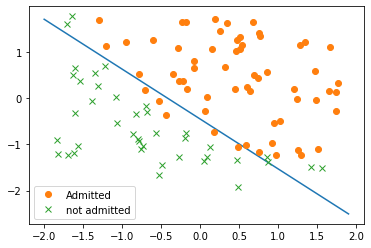

In [68]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o', label='Admitted')
plt.plot(X1_0, X2_0, 'x', label='not admitted')
plt.legend()
plt.show()

Zadanie 2

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [70]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

LogisticRegression(C=100000.0)

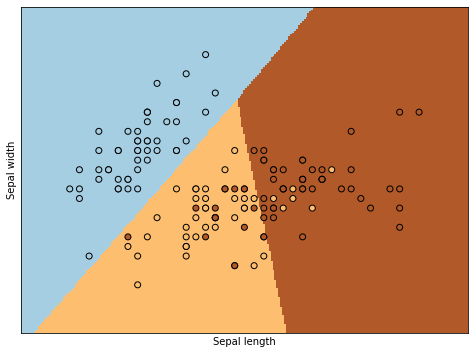

In [71]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [72]:
predictions = logreg.predict_proba(X)
predictions

array([[1.00000000e+00, 1.31551153e-13, 1.91419233e-14],
       [9.99999965e-01, 3.24521032e-08, 2.63646455e-09],
       [1.00000000e+00, 6.61524924e-17, 3.98331074e-18],
       [1.00000000e+00, 3.15404470e-17, 1.50790379e-18],
       [1.00000000e+00, 5.93945141e-18, 7.44040693e-19],
       [1.00000000e+00, 1.18112206e-14, 3.57551062e-15],
       [1.00000000e+00, 2.90645033e-23, 1.56890317e-24],
       [1.00000000e+00, 6.27214793e-14, 7.24627840e-15],
       [1.00000000e+00, 7.16986717e-18, 2.16088931e-19],
       [1.00000000e+00, 3.15796916e-10, 2.67154681e-11],
       [1.00000000e+00, 1.24728225e-10, 3.48222156e-11],
       [1.00000000e+00, 1.35017356e-18, 1.06624149e-19],
       [1.00000000e+00, 1.50566903e-10, 1.01132847e-11],
       [1.00000000e+00, 3.23714970e-22, 8.39931056e-24],
       [9.99999585e-01, 2.48035024e-07, 1.67339167e-07],
       [1.00000000e+00, 1.03195302e-17, 6.76754902e-18],
       [1.00000000e+00, 1.18112206e-14, 3.57551062e-15],
       [1.00000000e+00, 1.31551

Accuracy 1: 0.8333333333333334
Accuracy 2: 0.8333333333333334


<AxesSubplot:>

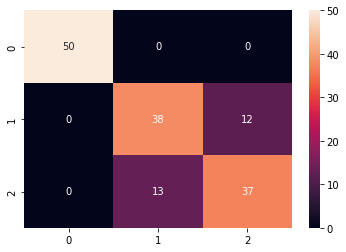

In [73]:
import seaborn as sns


predictions = logreg.predict(X)

print(f'Accuracy 1: {logreg.score(X,Y)}')
print(f'Accuracy 2: {metrics.accuracy_score(Y,predictions)}')
cf_matrix=metrics.confusion_matrix(Y, predictions)
sns.heatmap(cf_matrix, annot=True)


